In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
import pickle
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
df = pd.read_csv("./Data/Data.csv")
print(df.shape)
df.head()

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [5]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [6]:
df.drop(columns=['EventId'],axis=1,inplace=True)

In [7]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [8]:
df.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [9]:
df.replace(-999.0, np.nan, inplace=True)

In [10]:
250000

250000

In [11]:
df.isnull().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [12]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,round(df[feature].isnull().mean()*100),'% missing values')

DER_mass_MMC 15 % missing values
DER_deltaeta_jet_jet 71 % missing values
DER_mass_jet_jet 71 % missing values
DER_prodeta_jet_jet 71 % missing values
DER_lep_eta_centrality 71 % missing values
PRI_jet_leading_pt 40 % missing values
PRI_jet_leading_eta 40 % missing values
PRI_jet_leading_phi 40 % missing values
PRI_jet_subleading_pt 71 % missing values
PRI_jet_subleading_eta 71 % missing values
PRI_jet_subleading_phi 71 % missing values


In [13]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,211886.000000,250000.000000,250000.000000,250000.000000,72544.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403826,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,57.298157,35.344886,40.828691,63.655682,1.742386,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,91.885250,19.241000,59.388750,14.068750,0.882750,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [14]:
df.drop(columns=['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                 'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 
                 'PRI_jet_subleading_phi'], inplace=True)

In [15]:
df['Label'] = df['Label'].replace({'b': 0, 's': 1})

In [16]:
df['DER_mass_MMC'].fillna(df['DER_mass_MMC'].median(), inplace=True)
df['PRI_jet_leading_pt'].fillna(df['PRI_jet_leading_pt'].median(), inplace=True)
df['PRI_jet_leading_eta'].fillna(df['PRI_jet_leading_eta'].median(), inplace=True)
df['PRI_jet_leading_phi'].fillna(df['PRI_jet_leading_phi'].median(), inplace=True)

In [155]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [17]:
df.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
num_cols = [cols for cols in df.columns if df[cols].dtype != 'O']
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'O']

print(f"We have {len(num_cols)} numeric features which are : {num_cols}\n" )
print(f"We have {len(cat_cols)} categorical features which are : {cat_cols} " )

We have 25 numeric features which are : ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']

We have 0 categorical features which are : [] 


In [20]:
num_cols

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_all_pt',
 'Weight',
 'Label']

In [21]:
num_cols = ['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_all_pt',
 'Weight']

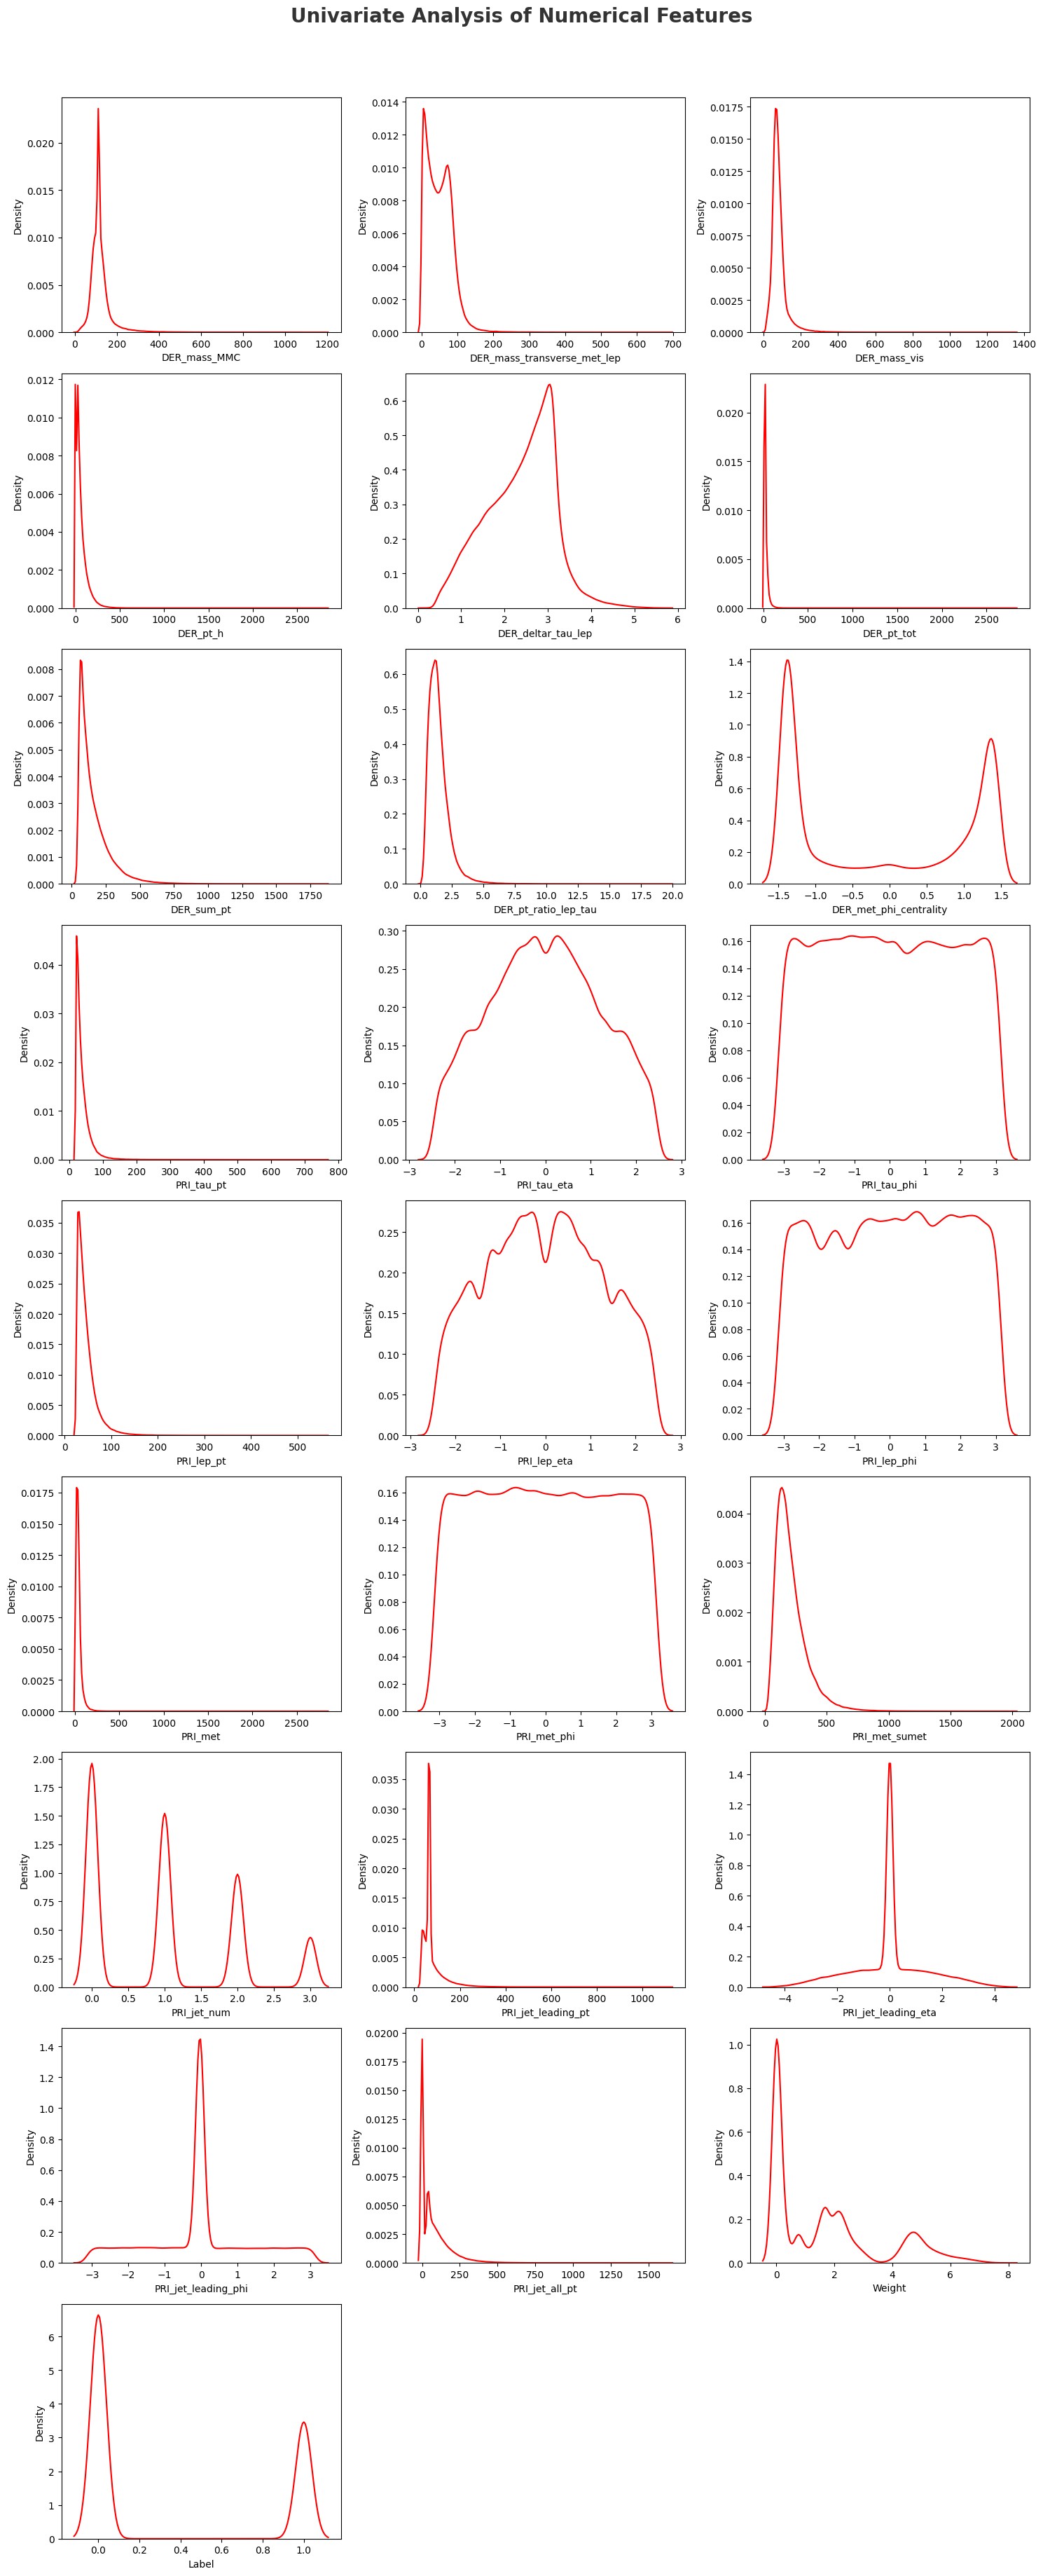

In [22]:
import math
# Assuming num_cols is your list of numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Example of num_cols generation

# Number of columns you want in each row of subplots
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)  # Dynamically calculate the number of rows needed

# Set up the figure size dynamically based on the number of rows and columns
plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(x=df[col], color='r')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(provided_features, df):
    X =df[provided_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [27]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.223531e+00
1,DER_mass_transverse_met_lep,2.612841e+00
2,DER_mass_vis,5.565625e+00
3,DER_pt_h,1.007422e+01
4,DER_deltar_tau_lep,3.522133e+00
5,DER_pt_tot,1.406016e+00
6,DER_sum_pt,4.470385e+10
7,DER_pt_ratio_lep_tau,5.527855e+00
8,DER_met_phi_centrality,2.004232e+00
9,PRI_tau_pt,1.677242e+09


In [28]:
df.drop(columns=['Weight'],axis=1,inplace=True)

In [29]:
num_cols = [cols for cols in df.columns if df[cols].dtype != 'O']

In [31]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.208499e+00
1,DER_mass_transverse_met_lep,2.583998e+00
2,DER_mass_vis,5.539297e+00
3,DER_pt_h,1.007374e+01
4,DER_deltar_tau_lep,3.517500e+00
5,DER_pt_tot,1.388685e+00
6,DER_sum_pt,4.470362e+10
7,DER_pt_ratio_lep_tau,5.446119e+00
8,DER_met_phi_centrality,1.969291e+00
9,PRI_tau_pt,1.677237e+09


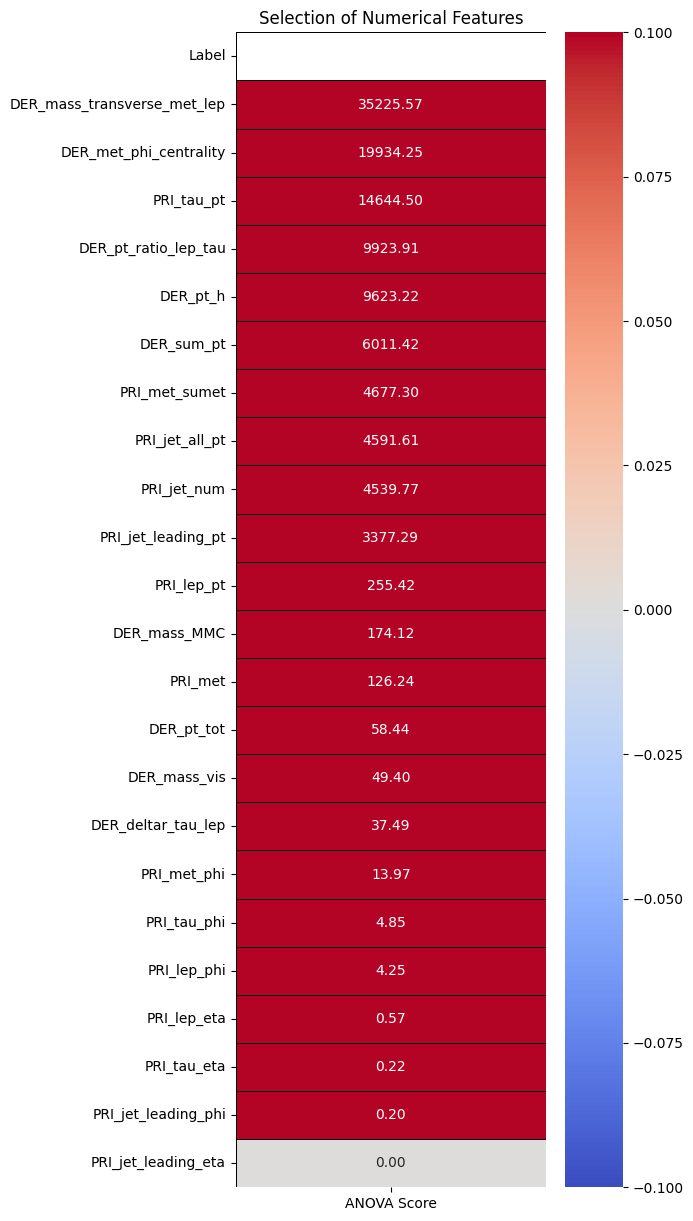

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df.loc[:,num_cols]
target = df.loc[:,'Label']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,15))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [33]:
df['Label'] = df['Label'].replace({'b': 0, 's': 1})

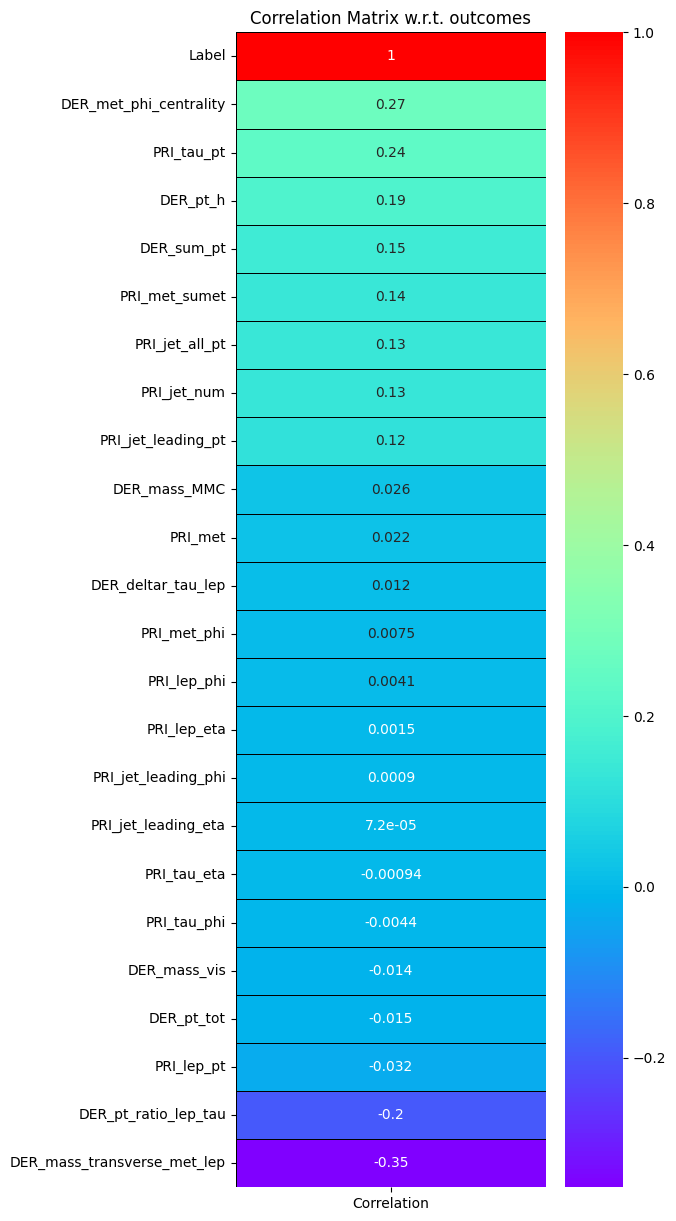

In [34]:
corr = df[num_cols].corrwith(df['Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [35]:
df.drop(columns=['PRI_jet_all_pt'],inplace=True,axis=1)

In [36]:
num_cols

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_all_pt',
 'Label']

In [37]:
num_cols=['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi']

In [ ]:
#after dropping PRI_jet_all_pt

In [38]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.208317
1,DER_mass_transverse_met_lep,2.487501
2,DER_mass_vis,5.436277
3,DER_pt_h,10.073713
4,DER_deltar_tau_lep,3.403463
5,DER_pt_tot,1.386326
6,DER_sum_pt,32.590504
7,DER_pt_ratio_lep_tau,5.392893
8,DER_met_phi_centrality,1.944846
9,PRI_tau_pt,4.388860


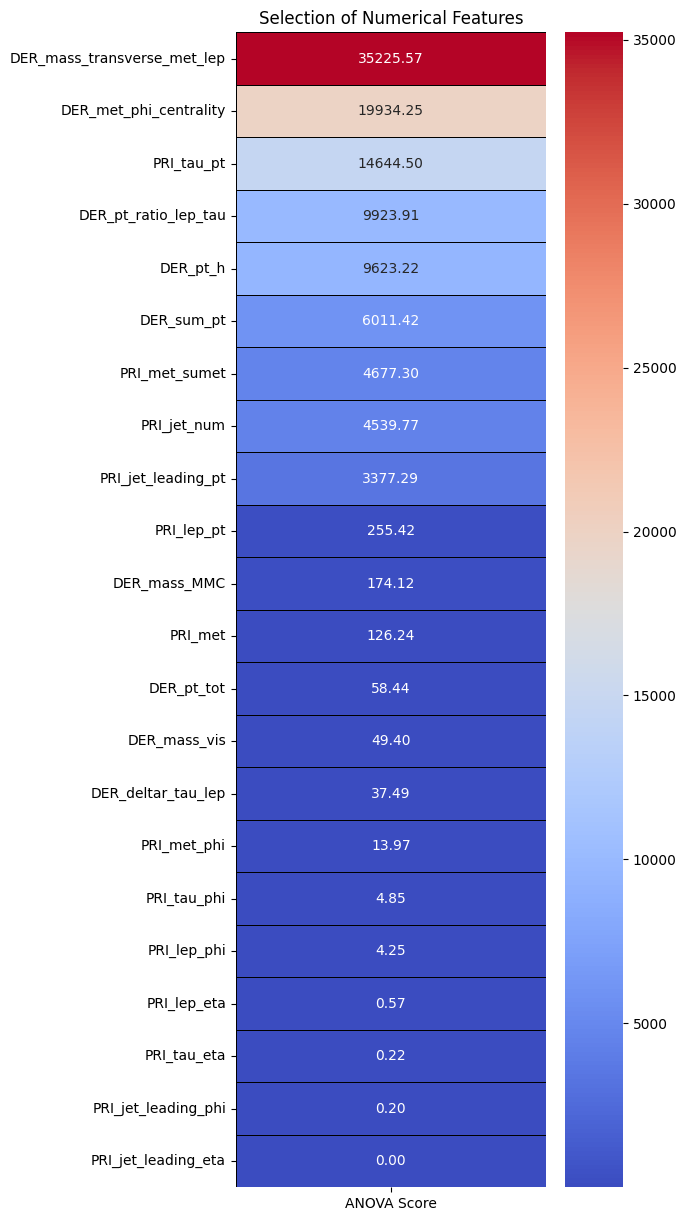

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df.loc[:,num_cols]
target = df.loc[:,'Label']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,15))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

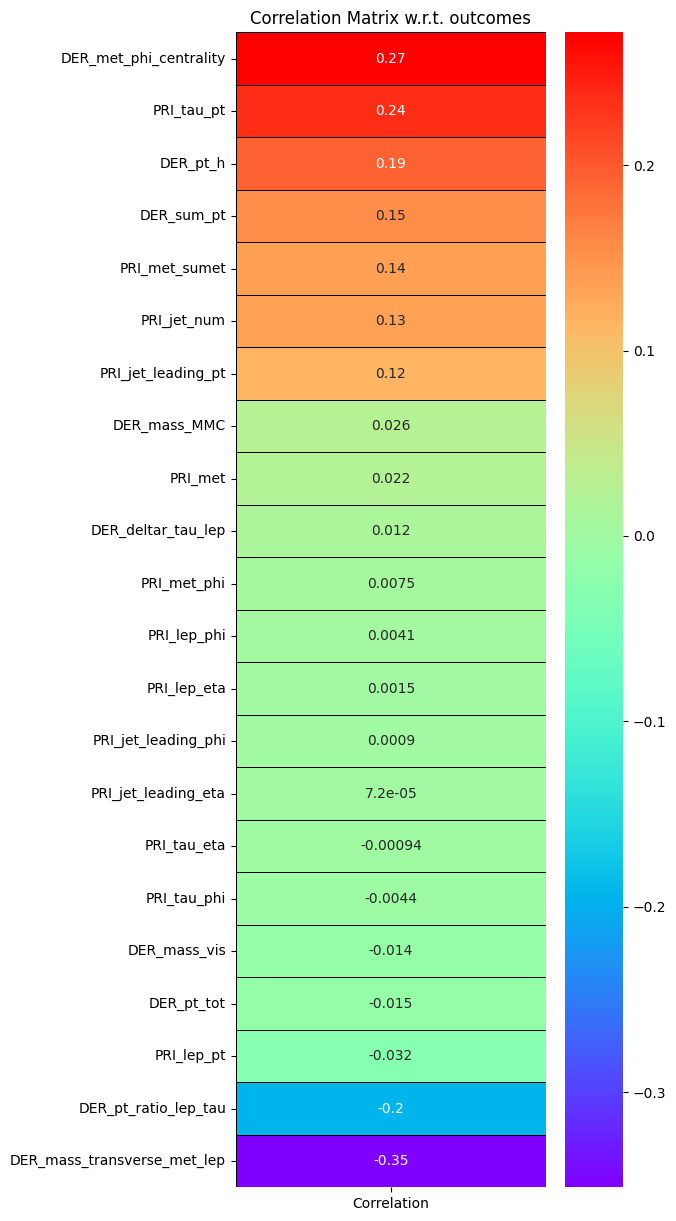

In [40]:
corr = df[num_cols].corrwith(df['Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

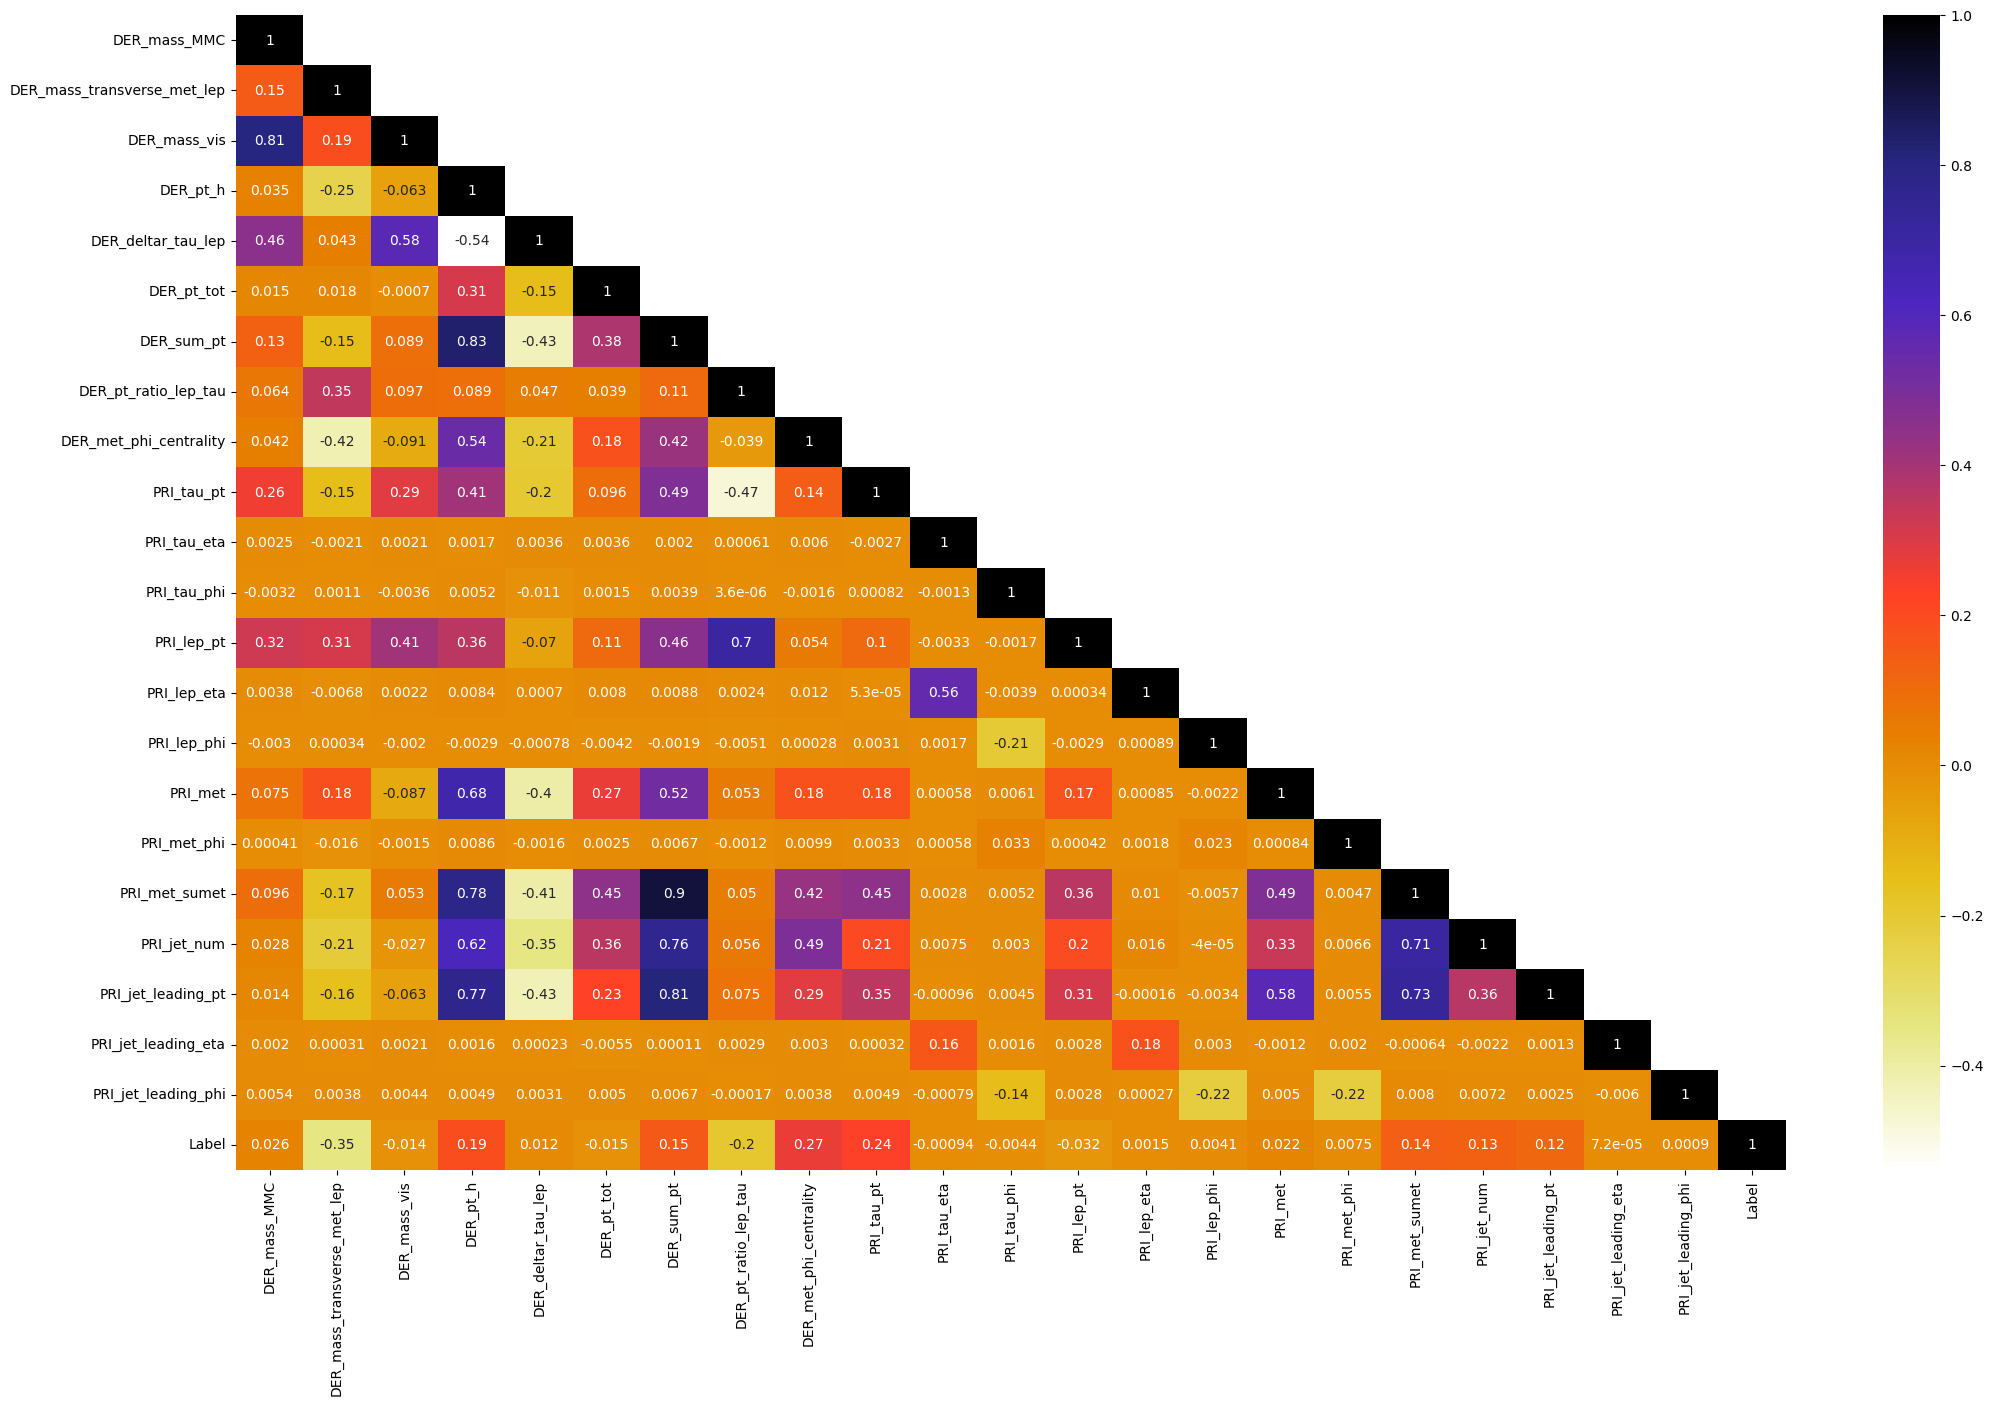

In [41]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), cmap='CMRmap_r', annot = True, mask = np.triu(df.corr(numeric_only=True), k=1))
plt.show()

In [42]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.208317
1,DER_mass_transverse_met_lep,2.487501
2,DER_mass_vis,5.436277
3,DER_pt_h,10.073713
4,DER_deltar_tau_lep,3.403463
5,DER_pt_tot,1.386326
6,DER_sum_pt,32.590504
7,DER_pt_ratio_lep_tau,5.392893
8,DER_met_phi_centrality,1.944846
9,PRI_tau_pt,4.388860


In [ ]:
#dropping  PRI_jet_all_pt DER_sum_pt

In [43]:
df.drop(columns=['DER_sum_pt'],inplace=True,axis=1)

In [49]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.208315
1,DER_mass_transverse_met_lep,2.487279
2,DER_mass_vis,5.436170
3,DER_pt_h,10.006868
4,DER_deltar_tau_lep,3.403459
5,DER_pt_tot,1.349839
6,DER_pt_ratio_lep_tau,5.392856
7,DER_met_phi_centrality,1.944770
8,PRI_tau_pt,3.488424
9,PRI_tau_eta,1.459090


In [44]:
num_cols

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi']

In [47]:
num_cols = ['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi']

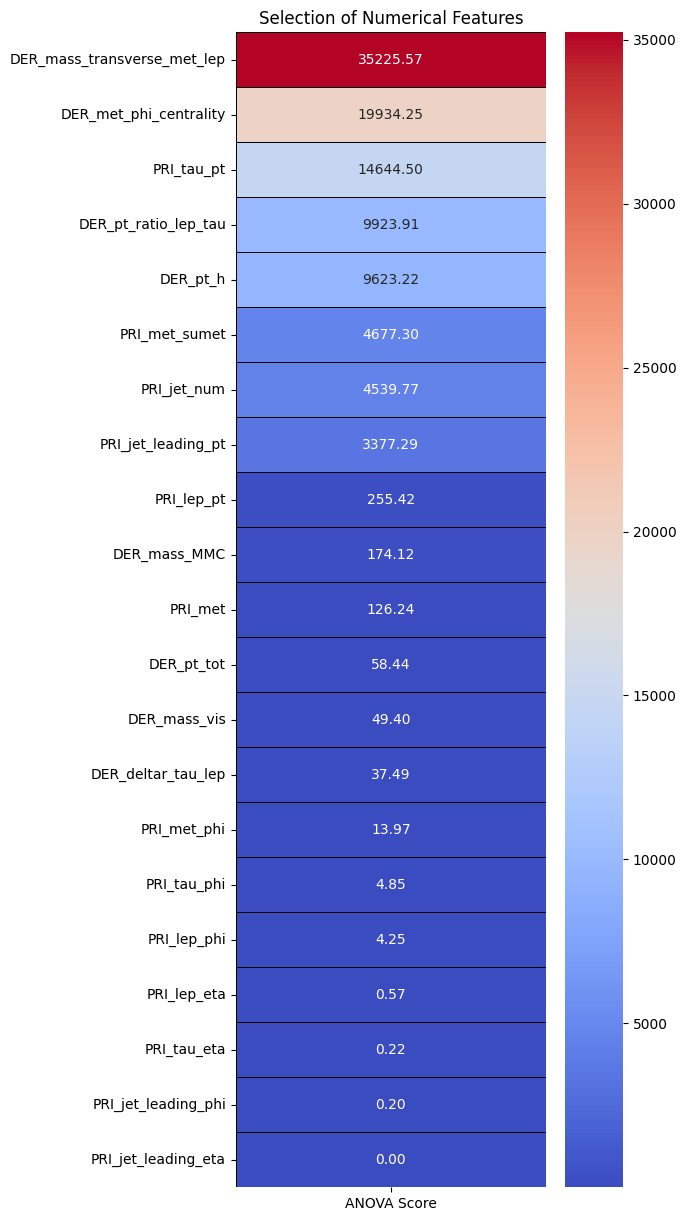

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df.loc[:,num_cols]
target = df.loc[:,'Label']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,15))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

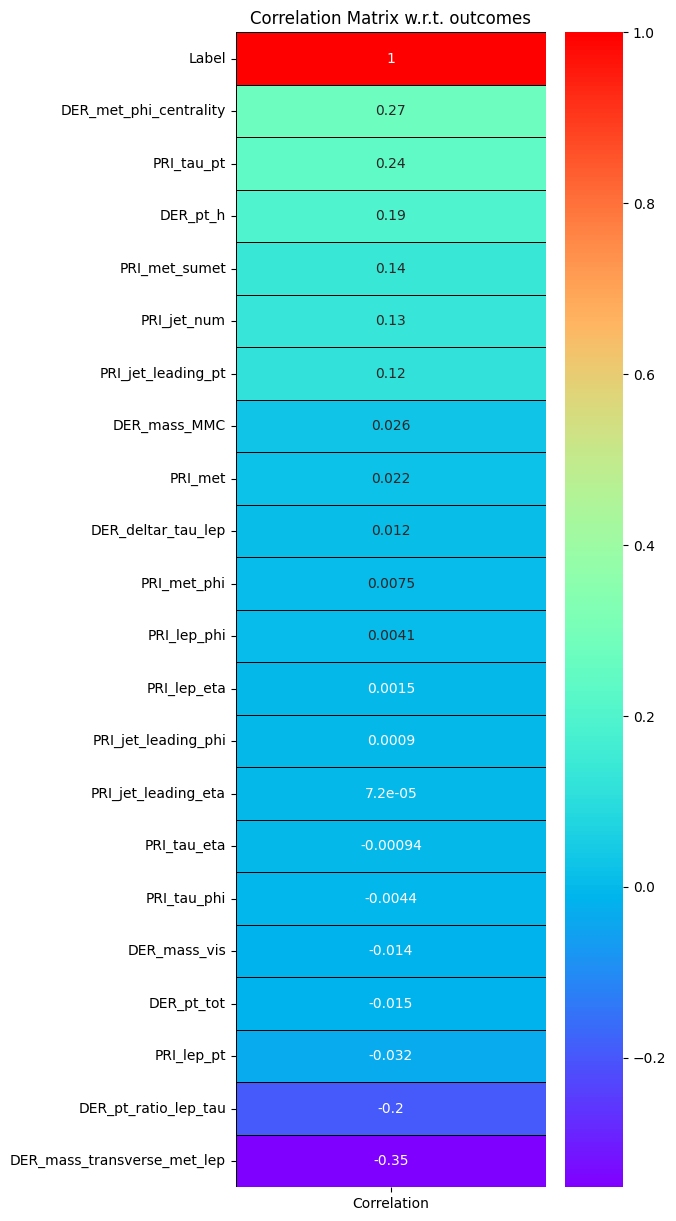

In [188]:
corr = df[num_cols].corrwith(df['Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [189]:
compute_vif(num_cols,df)

,Variable,VIF
0,DER_mass_MMC,3.208496
1,DER_mass_transverse_met_lep,2.583597
2,DER_mass_vis,5.539075
3,DER_pt_h,10.006944
4,DER_deltar_tau_lep,3.517493
5,DER_pt_tot,1.352443
6,DER_pt_ratio_lep_tau,5.446100
7,DER_met_phi_centrality,1.969240
8,PRI_tau_pt,3.541982
9,PRI_tau_eta,1.459091


In [50]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.373100,18.917332,1.437609,-0.128305,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,0.342668
std,52.859218,35.344886,40.828691,63.655682,0.782911,22.273494,0.844743,1.193585,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,0.474603
min,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000
25%,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,0.000000
75%,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,1.777000,1.225000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,19.773000,1.414000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1.000000


In [51]:
x = df.drop(['Label'], axis=1)
y = df['Label']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
df['Label'].value_counts()

Label
0    164333
1     85667
Name: count, dtype: int64

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [52]:
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    #"Support Vector Classifier":SVC(),
    "XGBClassifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.8332
F1 Score:0.8309
precision:0.7815
recall:0.7045
Roc Auc Score:0.8018


Decision Tree
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.7589
F1 Score:0.7597
precision:0.6405
recall:0.6570
Roc Auc Score:0.7341


Gradient Boosting
model performance for training set
Accuracy:0.8304
F1 Score:0.8285
precision:0.7764
recall:0.7112
Roc Auc Score:0.8020
-----------------------------------
model performance for test set
Accuracy:0.8280
F1 Score:0.8262
precision:0.7671
recall:0.7068
Roc Auc Score:0.7984


AdaBoost Classifier
model performance for training set
Accuracy:0.8104
F1 Score:0.8088
precision:0.7400
recall:0.6911
Roc Auc Score:0.7820

  File "c:\Users\naiko\anaconda3\envs\ppec\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Neighbors Classifier
model performance for training set
Accuracy:0.8543
F1 Score:0.8536
precision:0.7987
recall:0.7700
Roc Auc Score:0.8342
-----------------------------------
model performance for test set
Accuracy:0.7889
F1 Score:0.7885
precision:0.6919
recall:0.6793
Roc Auc Score:0.7622


XGBClassifier
model performance for training set
Accuracy:0.8590
F1 Score:0.8578
precision:0.8153
recall:0.7623
Roc Auc Score:0.8359
-----------------------------------
model performance for test set
Accuracy:0.8337
F1 Score:0.8323
precision:0.7718
recall:0.7225
Roc Auc Score:0.8066


Learning rate set to 0.098963
0:	learn: 0.6327083	total: 181ms	remaining: 3m
1:	learn: 0.5867640	total: 204ms	remaining: 1m 41s
2:	learn: 0.5526217	total: 226ms	remaining: 1m 15s
3:	learn: 0.5250893	total: 249ms	remaining: 1m 2s
4:	learn: 0.5036116	total: 272ms	remaining: 54.2s
5:	learn: 0.4866370	total: 293ms	remaining: 48.6s
6:	learn: 0.4724134	total: 316ms	remaining: 44.8s
7:	learn: 0.4618231	total: 339ms	remaini

In [54]:
x.shape

(250000, 21)

In [55]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {''
              'max_depth': [5, 15, 4,6,8,21],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'n_estimators':[100,200,400,1000]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 15, 4,6,8]}

In [56]:
randomcv_models = [('KNN',KNeighborsClassifier(), knn_params),
                  ('RF',RandomForestClassifier(), rf_params),
                  ('XGBoost',XGBClassifier() , xgboost_params),
                  ('CatBoost',CatBoostClassifier(verbose=False), cat_params)]

In [57]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 40, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 21, 'criterion': 'gini'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 300, 'learning_rate': 0.1, 'colsample_bytree': 0.4}
---------------- Best Params for CatBoost ------------
{'max_depth': 6, 'learning_rate': 0.1}


In [58]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 21, criterion = 'gini'),
    "K-Neighbors Classifier":KNeighborsClassifier( n_neighbors = 40, metric = 'manhattan'),
    "XGBClassifier":XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.4),
    "CatBoosting Classifier":CatBoostClassifier(max_depth = 6, learning_rate = 0.1, verbose= False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9776
F1 Score:0.9776
precision:0.9678
recall:0.9669
Roc Auc Score:0.9750
-----------------------------------
model performance for test set
Accuracy:0.8357
F1 Score:0.8338
precision:0.7823
recall:0.7136
Roc Auc Score:0.8060


K-Neighbors Classifier
model performance for training set
Accuracy:0.8288
F1 Score:0.8268
precision:0.7746
recall:0.7077
Roc Auc Score:0.7999
-----------------------------------
model performance for test set
Accuracy:0.8191
F1 Score:0.8172
precision:0.7533
recall:0.6928
Roc Auc Score:0.7883


XGBClassifier
model performance for training set
Accuracy:0.8577
F1 Score:0.8563
precision:0.8160
recall:0.7564
Roc Auc Score:0.8335
-----------------------------------
model performance for test set
Accuracy:0.8361
F1 Score:0.8346
precision:0.7771
recall:0.7238
Roc Auc Score:0.8087


CatBoosting Classifier
model performance for training set
Accuracy:0.8608
F1 Score:0.8595
precision:0.8206
recall:0.7613
Roc Auc Scor

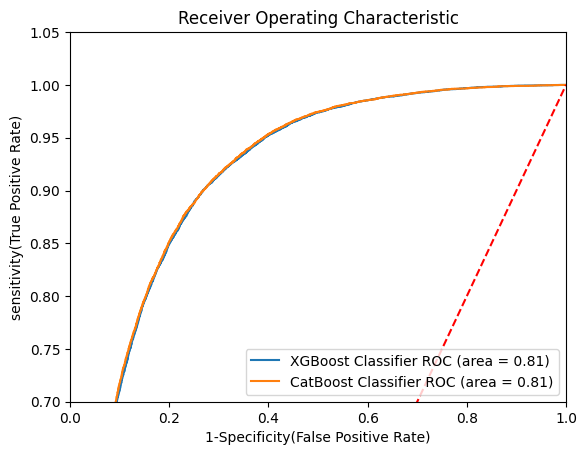

In [62]:
plt.figure()

auc_models = [
{
        'label': 'XGBoost Classifier',
        'Model' : XGBClassifier(n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.4),
        'auc': 0.8087
},
{
        'label': 'CatBoost Classifier',
        'Model' : CatBoostClassifier(max_depth = 6, learning_rate = 0.1, verbose= False),
        'auc': 0.8109
}
]
for algo in auc_models:
    model = algo['Model']
    model.fit(x_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.figure()

auc_models = [
{
        'label': 'Random Forest Classifier',
        'Model' : RandomForestClassifier(n_estimators = 400, max_features = 'sqrt', max_depth = 15, criterion = 'gini'),
        'auc': 0.9667
},
{
        'label': 'KNN Classifier',
        'Model' : KNeighborsClassifier( n_neighbors = 2, metric = 'manhattan'),
        'auc': 0.9819
},
{
        'label': 'XGBoost Classifier',
        'Model' : XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 1),
        'auc': 0.9601
},
{
        'label': 'CatBoost Classifier',
        'Model' : CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False),
        'auc': 0.9888
}
]
for algo in auc_models:
    model = algo['Model']
    model.fit(x_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [197]:
df['Label'].value_counts()

Label
0    164333
1     85667
Name: count, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(x,y)

  File "c:\Users\naiko\anaconda3\envs\ppec\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(262932, 21)
(65734, 21)
(262932,)
(65734,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [212]:
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    #"Support Vector Classifier":SVC(),
    "XGBClassifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.8613
F1 Score:0.8613
precision:0.8557
recall:0.8707
Roc Auc Score:0.8612


Decision Tree
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.7875
F1 Score:0.7875
precision:0.7819
recall:0.8003
Roc Auc Score:0.7875


Gradient Boosting
model performance for training set
Accuracy:0.8254
F1 Score:0.8254
precision:0.8229
recall:0.8289
Roc Auc Score:0.8254
-----------------------------------
model performance for test set
Accuracy:0.8210
F1 Score:0.8210
precision:0.8200
recall:0.8247
Roc Auc Score:0.8210


AdaBoost Classifier
model performance for training set
Accuracy:0.8017
F1 Score:0.8016
precision:0.7915
recall:0.8185
Roc Auc Score:0.8017

In [213]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
            'metric':['minkowski','manhattan']}
rf_params = {''
              'max_depth': [5, 15, 4,6,8,21],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'n_estimators':[100,200,400,1000]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 15, 4,6,8]}

In [214]:
randomcv_models = [('KNN',KNeighborsClassifier(), knn_params),
                  ('RF',RandomForestClassifier(), rf_params),
                  ('XGBoost',XGBClassifier() , xgboost_params),
                  ('CatBoost',CatBoostClassifier(verbose=False), cat_params)]

In [216]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 20, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 21, 'criterion': 'gini'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 300, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost ------------
{'max_depth': 15, 'learning_rate': 0.1}


In [58]:
models = {
    #"Random Forest":RandomForestClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 21, criterion = 'gini'),
    "K-Neighbors Classifier":KNeighborsClassifier( n_neighbors = 20, metric = 'manhattan'),
    "XGBClassifier":XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.8),
    "CatBoosting Classifier":CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

K-Neighbors Classifier
model performance for training set
Accuracy:0.8442
F1 Score:0.8441
precision:0.8257
recall:0.8723
Roc Auc Score:0.8443
-----------------------------------
model performance for test set
Accuracy:0.8244
F1 Score:0.8242
precision:0.8073
recall:0.8543
Roc Auc Score:0.8242


XGBClassifier
model performance for training set
Accuracy:0.8680
F1 Score:0.8680
precision:0.8640
recall:0.8731
Roc Auc Score:0.8680
-----------------------------------
model performance for test set
Accuracy:0.8479
F1 Score:0.8479
precision:0.8439
recall:0.8555
Roc Auc Score:0.8478


CatBoosting Classifier
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.8748
F1 Score:0.8748
precision:0.8648
recall:0.8899
Roc Auc Score:0.8747




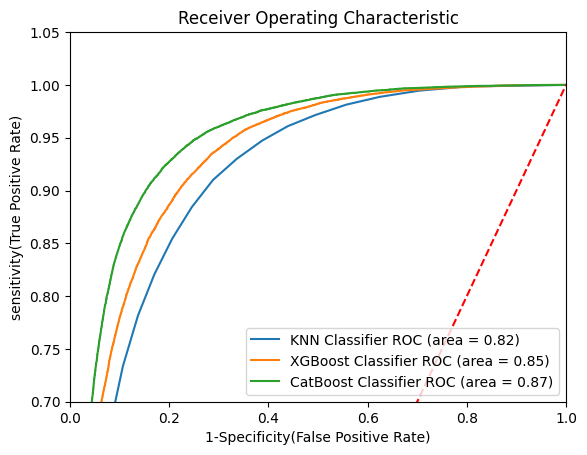

In [64]:
plt.figure()

auc_models = [

{
        'label': 'KNN Classifier',
        'Model' : KNeighborsClassifier(n_neighbors = 20, metric = 'manhattan'),
        'auc': 0.8242
},
{
        'label': 'XGBoost Classifier',
        'Model' : XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.8),
        'auc': 0.8478
},
{
        'label': 'CatBoost Classifier',
        'Model' : CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False),
        'auc': 0.8747
}
]
for algo in auc_models:
    model = algo['Model']
    model.fit(x_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=22)

In [66]:
cat_cv_result = cross_val_score(CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
cat_cv = cat_cv_result.mean()*100
print(f'Catboost CV Mean Accuracy Score is {cat_cv}')

KeyboardInterrupt: 

In [67]:
knn_cv_result = cross_val_score(KNeighborsClassifier( n_neighbors = 20, metric = 'manhattan'),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
knn_cv = knn_cv_result.mean()*100
print(f'KNN CV Mean Accuracy Score is {knn_cv}')  

KNN CV Mean Accuracy Score is 80.86227683930319


In [68]:
xb_cv_result = cross_val_score(XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.8),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
xb_cv = xb_cv_result.mean()*100
print(f'XGBoost CV Mean Accuracy Score is {xb_cv}') 

XGBoost CV Mean Accuracy Score is 84.33839612975447


In [69]:
best_model = XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 0.8)
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)

print("Final Model XGBOOST")
print(f"Accuracy Score Value:{score:.4f}")
print(cr)

Final Model CATBOOST
Accuracy Score Value:0.8479
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     32708
           1       0.84      0.86      0.85     33026

    accuracy                           0.85     65734
   macro avg       0.85      0.85      0.85     65734
weighted avg       0.85      0.85      0.85     65734



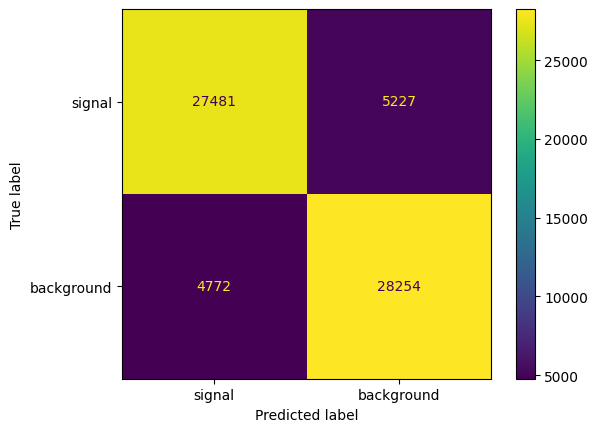

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['signal','background'])
disp.plot()

In [ ]:
#5227 missed to capture as signal

In [72]:
confusion_matrix(y_test,y_pred)

array([[27481,  5227],
       [ 4772, 28254]], dtype=int64)

In [75]:
import pickle 
pickle.dump(best_model, open('ppec.pkl', 'wb'))

In [76]:
#using PCA

In [77]:
df = pd.read_csv("./Data/Data.csv")
print(df.shape)
df.head()

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
